In [31]:
import numpy as np
import random
from matplotlib import pyplot as plt


def loss_func(indent):
    return 2 / (1 + np.exp(indent))


def loss(x_, y_, weights_):
    return loss_func(np.dot(weights_, x_) * y_)


def get_x_num(train_size_):
    return random.randint(0, train_size_ - 1)


def get_quality(x_train_, y_train_, weights_):
    result = 0.0
    for k in range(x_train_.shape[0]):
        result += loss(x_train_[k], y_train_[k], weights_)
    return result


def gradient(x_, y_, w_):
    result = np.array([0.0] * 3)
    loss_val = loss(x_, y_, w_)
    for k in range(3):
        result[k] = -x_[k] * y_ * loss_val * loss_val * np.exp(np.dot(w_, x_) * y_) / 2
    return result


x_train_py = [[10, 50], [20, 30], [25, 30], [20, 6], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train_py = [e + [1] for e in x_train_py]

x_train_form = np.array(x_train_py)

y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

start_weights = [0.0, 0.0, 0.0]
weights = start_weights

number_iterations = 1000
forgetting_speed = 0.01
learning_rate = 0.0005
train_size = x_train_form.shape[0]
quality = get_quality(x_train_form, y_train, weights) / train_size
quality_history = [quality]

print(quality)

1.0


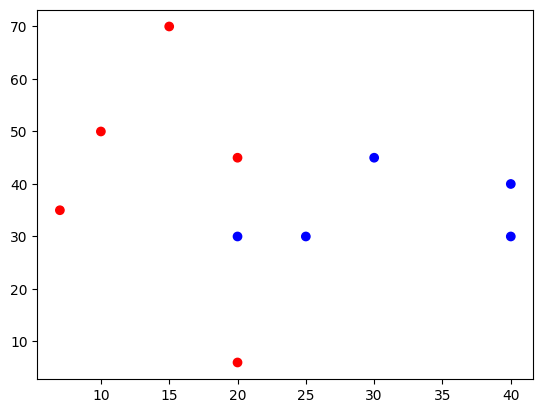

In [32]:
colors = np.array(['r', 'b'])
y_train_for_graph = np.array((y_train + 1)/2, dtype="int")
plt.scatter(x_train_form[:,0], x_train_form[:,1], color=colors[y_train_for_graph])

In [33]:

for i in range(number_iterations):
    index = get_x_num(train_size)
    current_loss = loss(x_train_form[index], y_train[index], weights)

    grad = gradient(x_train_form[index], y_train[index], weights)

    grad_rate = grad * learning_rate

    weights = weights - grad_rate

    quality = quality * (1 - forgetting_speed) + current_loss * forgetting_speed

    quality_history.append(quality)


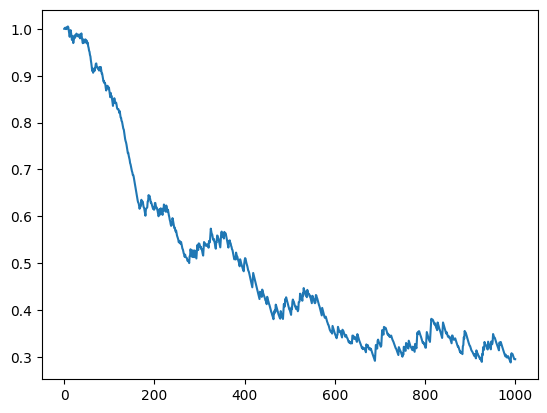

In [34]:
plt.plot(quality_history)
plt.show()
